# Prediction Ice Cream Sales with Linear Regression



Data set has 2 input features: Temperature in °C and Is Weekend flag (0/1).
Target is called Ice Creams Sold.

Neural network used can only have single input layer and single output layer without activation functions.

## Set up environment

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.draw_graph import draw_dot
from src.model.builder import build_model
from src.model.training import train_model
from src.model.evaluation import evaluate_model

import random
random.seed(42)

import numpy as np
np.random.seed(42) 

import pandas as pd
from pandas import DataFrame

from matplotlib import pyplot as plt

## Hyperparams

In [2]:
TEST_SIZE = 0.1

# 1e-2 is too high for more than one neuron (exploding gradients)
# 1e-3 makes training too erratic (jumping around minimum)
LEARNING_RATE = 1e-4
BATCH_SIZE = 8

EPOCHS = 1000

EARLY_STOPPING_PATIENCE = 10
EARLY_STOPPING_DELTA = 1e-3

HIDDEN_LAYERS_NUM = 0
HIDDEN_NEURONS_NUM = 0

## Load data

In [3]:
df = pd.read_csv("ice_cream_data.csv", sep=",")
df = df.sample(frac=1, random_state=42)
df.head()

,Temperature,Is_Weekend,Ice_Creams_Sold
110,18.692544,1,203
419,32.571236,0,275
565,27.697531,1,274
77,12.221340,0,104
181,13.404206,0,136


### Separate input from target

In [4]:
targets = df["Ice_Creams_Sold"]
inputs = df.drop(["Ice_Creams_Sold"], axis=1)

In [5]:
inputs.min()

Temperature    10.151848
Is_Weekend      0.000000
dtype: float64

In [6]:
inputs.max()

Temperature    39.99153
Is_Weekend      1.00000
dtype: float64

### Normalize input

In [7]:
def normalize_input(X: DataFrame):
    result = (X - X.min()) / (X.max() - X.min())
    return result

In [8]:
norm_inputs = normalize_input(inputs)

In [9]:
norm_inputs.min()

Temperature    0.0
Is_Weekend     0.0
dtype: float64

In [10]:
norm_inputs.max()

Temperature    1.0
Is_Weekend     1.0
dtype: float64

### Numpy

In [11]:
inputs = norm_inputs.to_numpy()
inputs[:5]

array([[0.2862194 , 1.        ],
       [0.75132798, 0.        ],
       [0.58799831, 1.        ],
       [0.06935369, 0.        ],
       [0.10899439, 0.        ]])

In [12]:
inputs.shape

(600, 2)

In [13]:
n_inputs = inputs.shape[1]

In [14]:
targets = targets.to_numpy()
targets[:5]

array([203, 275, 274, 104, 136])

### Train vs. Test set

In [15]:
test_size = int(len(inputs) * TEST_SIZE)
print(f"Train size: {len(inputs) - test_size}, Test size: {test_size}")

inputs_train = inputs[:-test_size]
targets_train = targets[:-test_size]

inputs_test = inputs[-test_size:]
targets_test = targets[-test_size:]

Train size: 540, Test size: 60


## Train Model

### Hyperparameter tuning

In [16]:
# Grid Search
hp_grid = {
    "learning_rate": [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4],
    "batch_size": [8, 16, 32, 64, 128, 256]
}

iteration = 0
best_loss = np.inf
best_learning_rate = 0
best_batch_size = 0
for learning_rate in hp_grid["learning_rate"]:
    for batch_size in hp_grid["batch_size"]:
        iteration += 1
        print(f"Search iteration: {iteration}")
        print(f"Testing learning_rate: {learning_rate} and batch_size: {batch_size}")

        inputs, target, output, loss = build_model(n_inputs, HIDDEN_LAYERS_NUM, HIDDEN_NEURONS_NUM)
        history = train_model(inputs_train, inputs_test, targets_train, targets_test, EPOCHS, batch_size, learning_rate, inputs, target, loss, EARLY_STOPPING_PATIENCE, EARLY_STOPPING_DELTA, log=False)
        average_loss = evaluate_model(inputs_test, targets_test, inputs, target, loss)

        print(f"Loss: {average_loss}")

        if (average_loss < best_loss):
            best_loss = average_loss
            best_learning_rate = learning_rate
            best_batch_size = batch_size

Search iteration: 1
Testing learning_rate: 0.05 and batch_size: 8
Loss: 178.03498381270487
Search iteration: 2
Testing learning_rate: 0.05 and batch_size: 16
Loss: 175.230024969549
Search iteration: 3
Testing learning_rate: 0.05 and batch_size: 32
Loss: 173.4520669669877
Search iteration: 4
Testing learning_rate: 0.05 and batch_size: 64
Loss: 174.1435847997499
Search iteration: 5
Testing learning_rate: 0.05 and batch_size: 128
Loss: 178.19800957833937
Search iteration: 6
Testing learning_rate: 0.05 and batch_size: 256
Loss: 227.2413220207627
Search iteration: 7
Testing learning_rate: 0.01 and batch_size: 8
Loss: 173.46432659869913
Search iteration: 8
Testing learning_rate: 0.01 and batch_size: 16
Loss: 174.04955329182488
Search iteration: 9
Testing learning_rate: 0.01 and batch_size: 32
Loss: 175.437536931622
Search iteration: 10
Testing learning_rate: 0.01 and batch_size: 64
Loss: 178.86537131065867
Search iteration: 11
Testing learning_rate: 0.01 and batch_size: 128
Loss: 480.5152082

In [17]:
print(best_batch_size)
print(best_learning_rate)

32
0.05


### Training

In [18]:
inputs, target, output, loss = build_model(n_inputs, HIDDEN_LAYERS_NUM, HIDDEN_NEURONS_NUM)

history = train_model(inputs_train, inputs_test, targets_train, targets_test, EPOCHS, best_batch_size, best_learning_rate, inputs, target, loss, EARLY_STOPPING_PATIENCE, EARLY_STOPPING_DELTA)

Epoch 0: loss=11841.171436971048, test_loss=inf
Epoch 1: loss=1636.7062743627043, test_loss=1820.4987078549455
Epoch 2: loss=1359.8035831757006, test_loss=1555.8040965847354
Epoch 3: loss=1193.3941331310837, test_loss=1389.1816559736833
Epoch 4: loss=893.2842351896054, test_loss=954.8401599278692
Epoch 5: loss=808.8727004901792, test_loss=968.0472485085461
Epoch 6: loss=744.4517306942656, test_loss=818.1572790858738
Epoch 7: loss=685.5473345207838, test_loss=718.6068903895631
Epoch 8: loss=583.8751204364655, test_loss=503.2050463459167
Epoch 9: loss=540.7838491769844, test_loss=502.7040692246115
Epoch 10: loss=467.58553929438756, test_loss=451.18491189690224
Epoch 11: loss=419.34769868267125, test_loss=336.5588460724117
Epoch 12: loss=421.1048676545482, test_loss=332.2011459094735
Epoch 13: loss=406.04739689949463, test_loss=311.94663747757164
Epoch 14: loss=357.3683579717848, test_loss=289.5131784637496
Epoch 15: loss=336.48873966061217, test_loss=261.3642684722129
Epoch 16: loss=349.

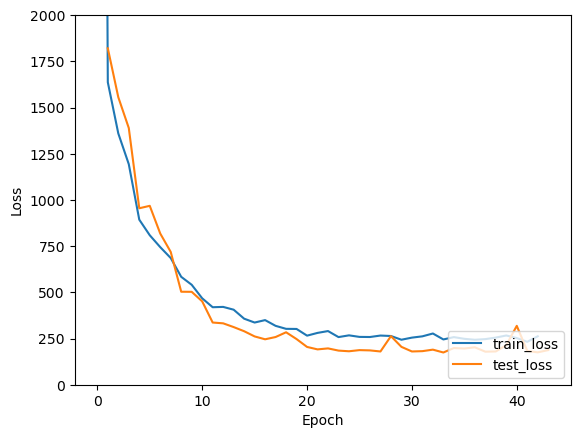

In [19]:
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["test_loss"], label="test_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 2000)
plt.legend(loc="lower right")

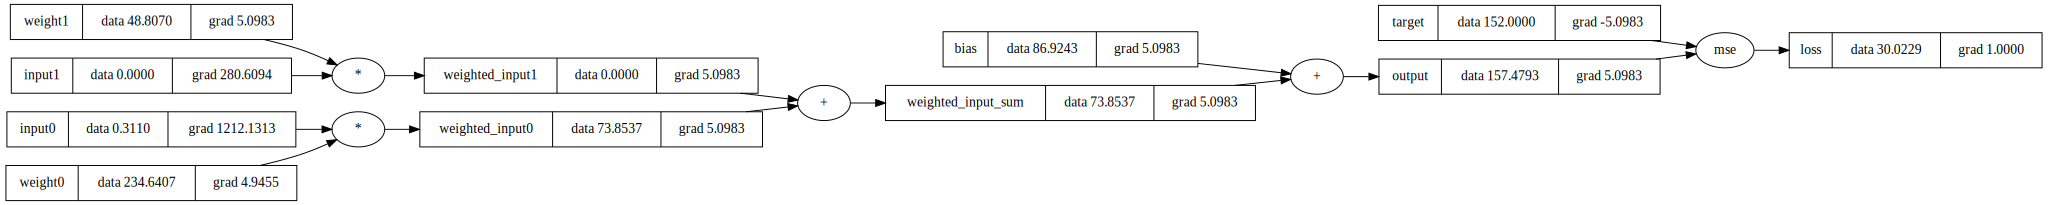

In [20]:
draw_dot(loss)

## Test solution

In [21]:
average_loss = evaluate_model(inputs_test, targets_test, inputs, target, loss)

In [22]:
rmse = np.sqrt(average_loss)
mean_target = np.mean(targets)
print("RMSE:", rmse)
print("Mean of targets:", mean_target)

RMSE: 13.206721912146671
Mean of targets: 216.425
